You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  

In [2]:
# import dataset  
df = pd.read_csv("Mall_Customers.csv", sep=",")  
  
# menampilkan data  
print (df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Menampilkan informasi data  
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Eksplorasi data

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bo

<Figure size 432x288 with 0 Axes>

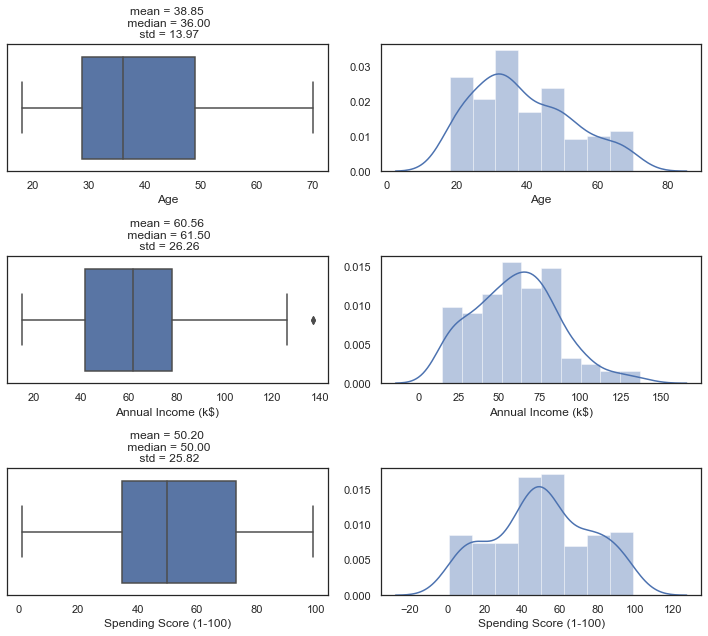

In [6]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(df[kol], ax = axs[i][0])
        sns.distplot(df[kol], ax = axs[i][1])   
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Age','Annual Income (k$)','Spending Score (1-100)'] 
observasi_num(kolom_numerik) 

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bo

<Figure size 432x288 with 0 Axes>

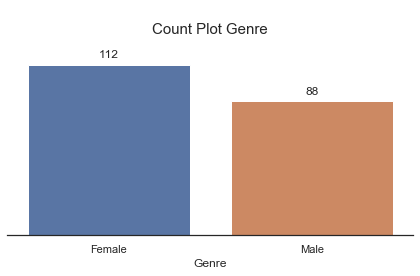

In [7]:
sns.set(style='white')
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Genre']  

# Membuat canvas
fig, axs = plt.subplots(1) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs)  
    axs.set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs.patches:  
        axs.annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs.axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  

Statistik Sebelum Standardisasi

         Age  Annual Income (k$)  Spending Score (1-100)
count  200.0               200.0                   200.0
mean    38.8                60.6                    50.2
std     14.0                26.3                    25.8
min     18.0                15.0                     1.0
25%     28.8                41.5                    34.8
50%     36.0                61.5                    50.0
75%     49.0                78.0                    73.0
max     70.0               137.0                    99.0
Contoh hasil standardisasi

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980
Statistik hasil standardisasi

         Age  Annual Income (k$)  Spending Score (1-100)
co

In [9]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  

# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())

   Genre
0      1
1      1
2      0
3      0
4      0


In [10]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print (df_model.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      1 -1.424569           -1.738999               -0.434801
1      1 -1.281035           -1.738999                1.195704
2      0 -1.352802           -1.700830               -1.715913
3      0 -1.137502           -1.700830                1.040418
4      0 -0.563369           -1.662660               -0.395980


#### Mencari jumlah cluster yang optimal

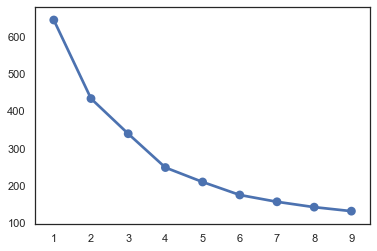

In [11]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(1,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

In [12]:
import pickle   
  
kproto = KPrototypes ( n_clusters = 4,random_state=75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

In [13]:
# Menentukan segmen tiap pelanggan    
clusters = kproto.predict(df_model, categorical=[0])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())  

segmen pelanggan: [1 0 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 2 0 2 2 2 0 0 2 0 0 2 0 2 2
 2 2 0 2 0 0 2 2 2 0 0 2 2 0 0 0 3 0 2 0 0 2 0 0 2 0 0 0 3 2 2 0 3 2 2 2 2
 0 0 0 0 0 2 2 2 2 2 0 0 2 0 2 2 3 2 2 2 2 0 0 1 2 0 2 1 2 0 2 0 2 0 2 2 2
 0 2 2 3 0 2 0 2 0 2 0 2 2 2 1 3 2 2 2 3 0 2 2 2 2 3 0 3 2 2 2 3 0 3 2 3 2
 3 2 2 0 3 0 3 2 3 2 3 3 3 2 3]

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        1  
1        0  
2        1  
3        0  
4        0  


In [15]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,4):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i].describe())
    print(df_final[df_final['cluster']== i]['Genre'].value_counts())


Pelanggan cluster: 0

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   91.000000  91.000000           91.000000               91.000000   
mean    73.956044  34.879121           48.626374               44.406593   
std     51.055071  12.464915           21.876242               23.420778   
min      2.000000  18.000000           15.000000                1.000000   
25%     31.500000  23.000000           30.000000               29.000000   
50%     66.000000  34.000000           48.000000               45.000000   
75%    112.500000  45.500000           63.500000               57.500000   
max    191.000000  65.000000          103.000000               99.000000   

       cluster  
count     91.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Female    73
Male      18
Name: Genre, dtype: int64

Pelanggan cluster: 1

       CustomerID        Age  Annual Income (k$)  Spending Score

#### Visualisasi Hasil Clustering - Box Plot

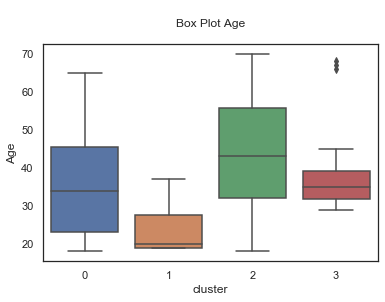

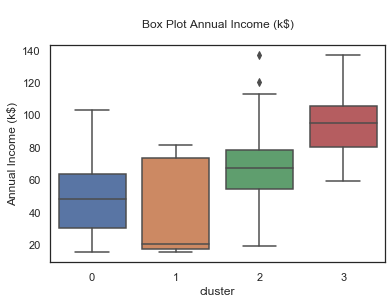

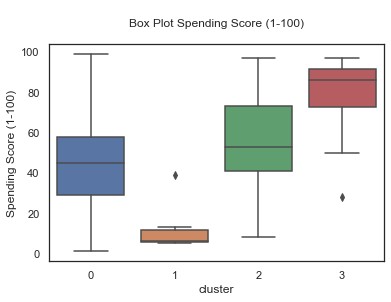

In [16]:
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

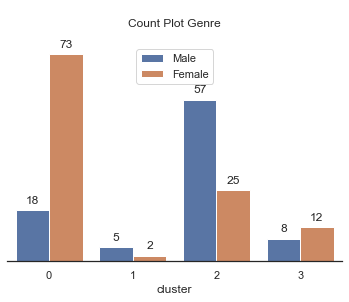

In [17]:
for i in kolom_kategorikal:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    ax.set_title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax. legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

#### Menamakan Cluster

Dari hasil observasi yang dilakukan dapat memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:

Cluster 0: Silver Member, isi cluster ini adalah pelanggan wanita dan pria usia muda hingga dewasa yaitu 18-65 tahun yang memiliki pendapatan rata-rata $48k dan rata-rata spending score 44.

Cluster 1: Classic Member, isi cluster ini adalah pelanggan wanita dan pria usia muda yaitu 19-37 tahun yang memiliki pendapatan rata-rata $42k dan rata-rata spending score 12.

Cluster 2: Gold Member, isi cluster ini adalah pelanggan wanita dan pria usia muda hingga dewasa yaitu 18-70 tahun yang memiliki pendapatan rata-rata $67k dan rata-rata spending score 53.

Cluster 3: Platinum Member, isi cluster ini adalah pelanggan wanita dan pria dewasa dengan usia yaitu 29-68 tahun yang memiliki pendapatan rata-rata $91k dan rata-rata spending score 79.

In [18]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Silver Member',  
    1: 'Classic Member',  
    2: 'Gold Member',  
    3: 'Platinum Member'
})  

print(df_final.info())
print(df_final.head(10))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    uint16
 6   segmen                  200 non-null    object
dtypes: int64(4), object(2), uint16(1)
memory usage: 9.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                    

Customer segmen yang dihasilkan dapat membantu tim marketing untuk  membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap-tiap pelanggan.

Penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan model nya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.

Tantangan lainnya adalah jumlah data yang jauh lebih banyak di banding dengan data set yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan model nya akan menjadi lebih lama.